# CASE STUDY: BREAST CANCER CLASSIFICATION

# STEP #1: PROBLEM STATEMENT


- Predicting if the cancer diagnosis is benign or malignant based on several observations/features 
- 30 features are used, examples:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign


https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


# STEP #2: IMPORTING DATA

In [ ]:
# pip install pandas
# pip install numpy
# python -m pip install -U matplotlib
# pip install seaborn
# pip install -U scikit-learn
# python -m pip show scikit-learn  # show scikit-learn version and location
# python -m pip freeze             # show all installed packages in the environment
# python -c "import sklearn; sklearn.show_versions()"

In [8]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes - Excel for python
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization - very powerful
# %matplotlib inline

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer = load_breast_cancer()

In [13]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

- **As we see the data is in meshed up format.**
- **At the begining we have the data - have all features.**
- **Then we have the target data - 0 or 1 - based on benign or malignant**


In [21]:
# Keys within the cancer dataset
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
print(cancer['DESCR']) # Description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [28]:
print(cancer['target']) # Print the different target values as 0 or 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [29]:
print(cancer['target_names']) # Print the name of the target value.

['malignant' 'benign']


In [30]:
print(cancer['feature_names']) # Name of the features

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [33]:
# Select the actual data as key
# To get the shape of the data - (rows, col)
# 569 rows and 30 columns, 30 columns as features.

cancer['data'].shape

(569, 30)

In [36]:
# In order to work with the data, we create the dataframe
# We create the pandas dataframe
# We take the cancer['data'] - means considering the 30 columns and cancer['target'] data = total 31 columns
# Including all traning data input and output in one dataframe
# Then we put the columns names - append the 30 columns with the output target column

df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'],['target']))

In [37]:
df_cancer.head() # First couple of rows

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [53]:
df_cancer.tail() # last couple rows - 568 rows and 31 columns

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115     0.0  
565                0.1628          0.2572                  0.06637     0.0  
566                0.1418          0.2218                  0.07820     0.0  
567                0.2650          0.4087                  0.12400     0.0  
568                0.0000          0.2871                  0.07039     1.0  

[5 rows x 31 columns]

In [56]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [57]:
x.shape

(3,)

In [54]:
Example = np.c_[np.array([1,2,3]), np.array([4,5,6])]
Example

array([[1, 4],
       [2, 5],
       [3, 6]])

In [55]:
Example.shape

(3, 2)

# STEP #3: VISUALIZING THE DATA

- #### We use:
    -  **Pair plot - It give the quick glance of the entire data in one place.**
        - It gives all the relation between the different variables.  
    -  **count plot** - To count the samples.
    -  **scatter plot** - To plot specific two variables.
- ### Pair Plot: Relation between different variables. 
    - #### For now we will not call all the variable - few of them.
    - #### It will show all the relationship between the columns
    - #### If we want the distribution of records based on target columns we can use "hue"

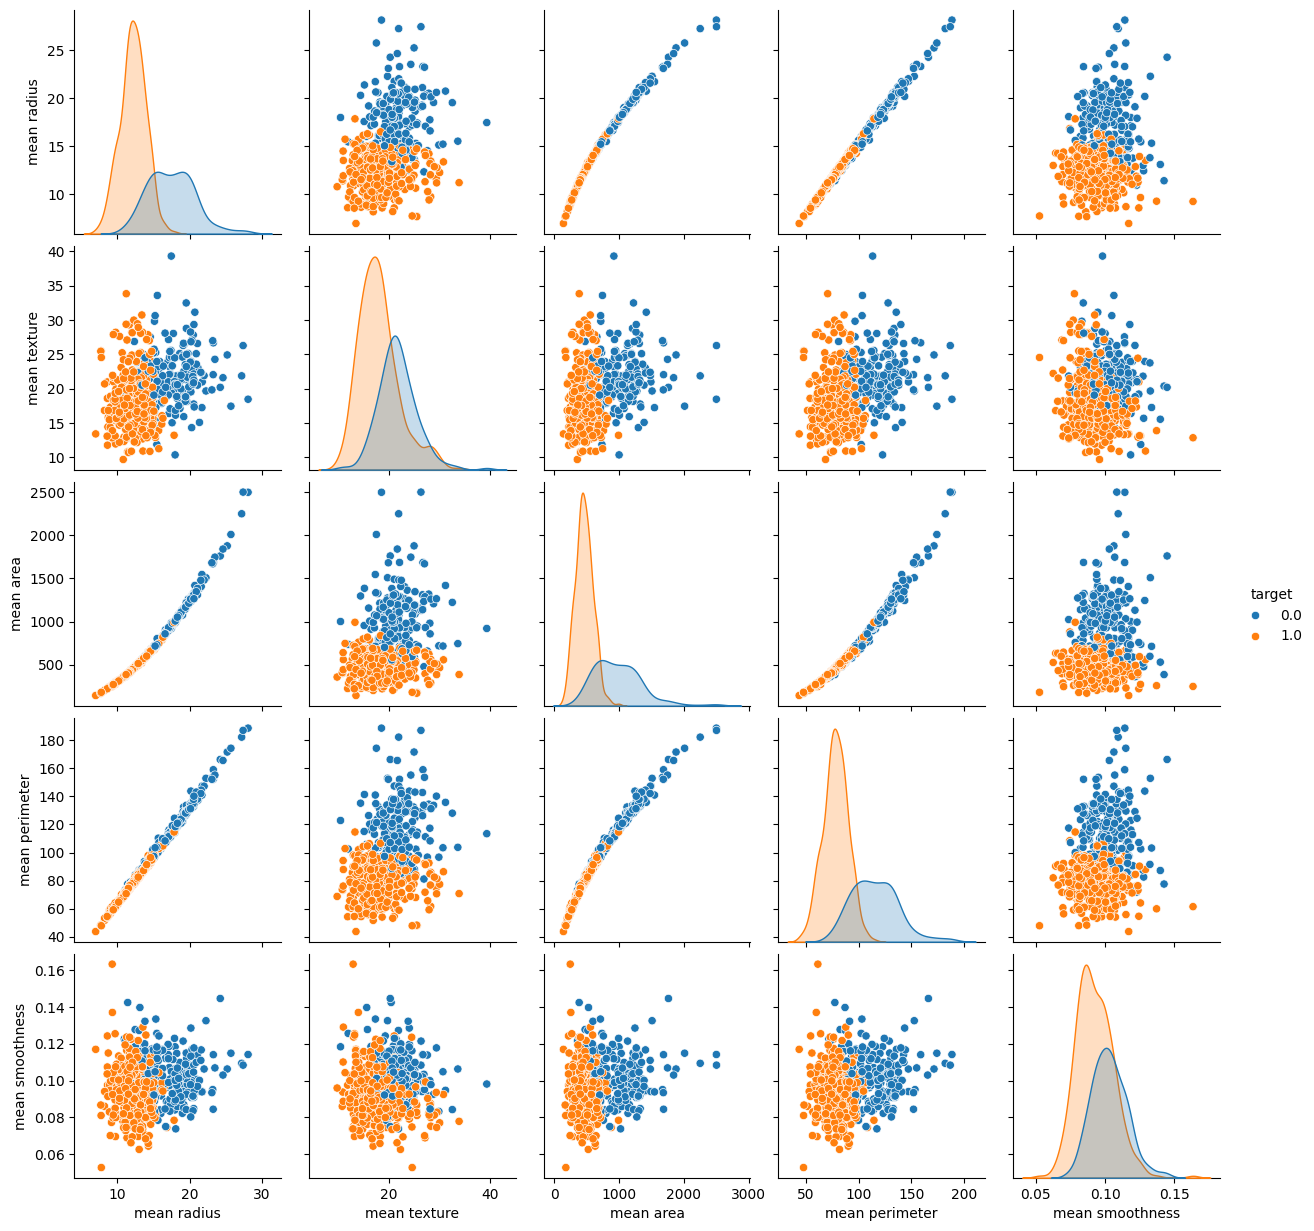

In [42]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

- ### Why mean area vs mean perimeter higher for malignant ?
    - #### If we look at the FNA image, we can see that malignant cells are bigger in size than benign cells.

- ### Count Plot: To count the samples
    - #### To get the "target" count, how many samples is 0 or 1

<Axes: xlabel='target', ylabel='Count'>

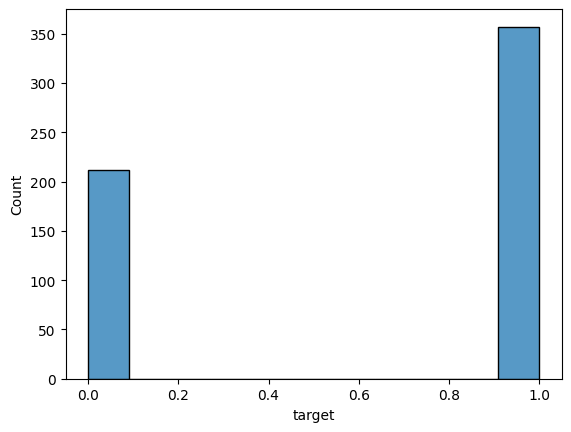

In [63]:
sns.histplot(df_cancer['target'], label = "Count")

### Scatter Plot: Relation between two specific variable
- We will pass the x-axis and y-axis as feature.
- Hue as target
- and the dataframe

<Axes: xlabel='mean area', ylabel='mean smoothness'>

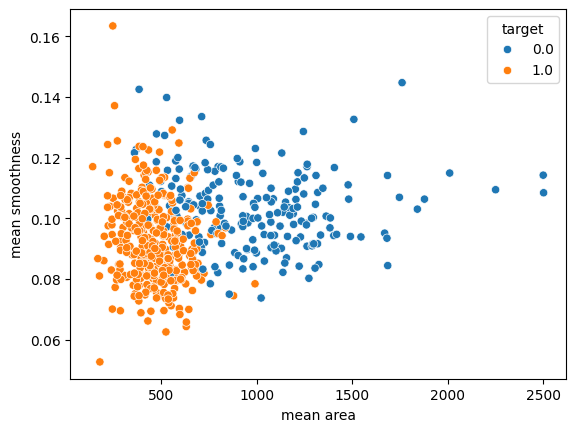

In [60]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)

### HeatMap - For Correlation
- We will run the correlation command to understand how these features are correlated.
- We have used **heatmap** and with dataframe, we have applied the method **"corr"**
- We use **"annot"** in the heatmap to give correlation values to the boxes.
- To adjust the size of the figure, we use **"plt.figure(figsize=(20,10))"**
- Taking all the 30 features correlation.

- #### Observation:
    - #### Let's check the correlation between the variables 
    - #### Strong correlation between the mean radius and mean perimeter, mean area and mean primeter 

<Axes: >

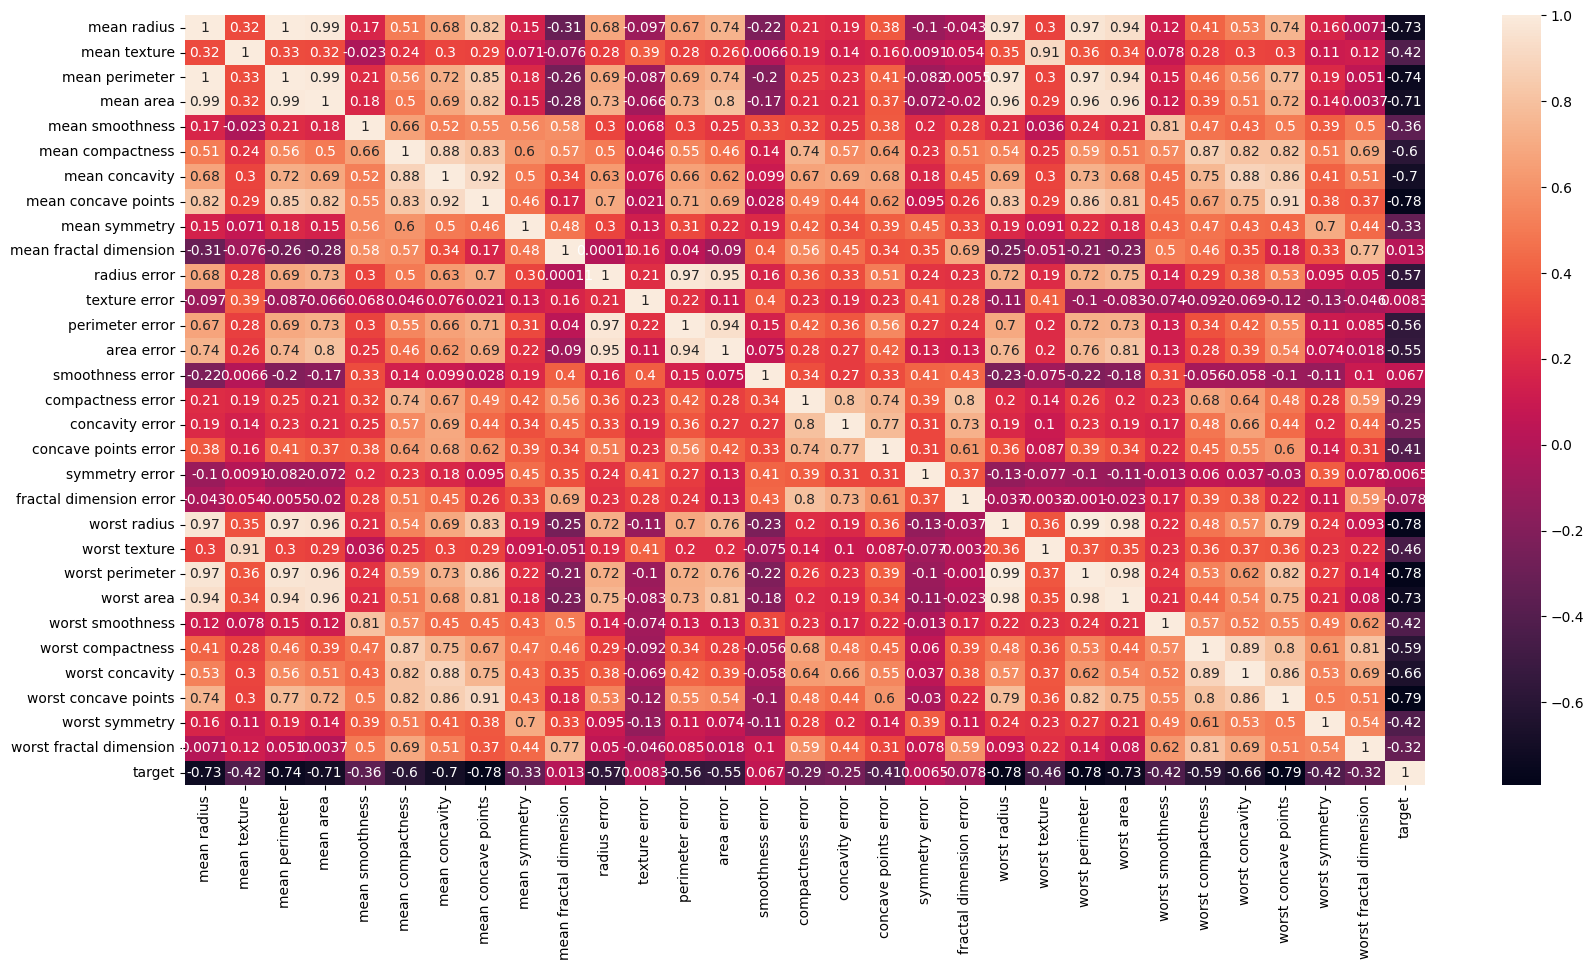

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(),annot=True)

# STEP #4: MODEL TRAINING (FINDING A PROBLEM SOLUTION)

- First, we define the X values: Input
    - For that we drop the "target" column.
    - **"axis=1"** We also define at what axis it will check name and drop.
- Y values: Output
- 

In [76]:
# Let's drop the target label columns
X = df_cancer.drop(['target'],axis=1)
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [77]:
Y = df_cancer['target']
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

- Now we split the data into training and test data using **sklearn train_test_split**

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [80]:
X_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
306       13.200         15.82           84.07      537.3          0.08511   
410       11.360         17.57           72.49      399.8          0.08858   
197       18.080         21.84          117.40     1024.0          0.07371   
376       10.570         20.22           70.15      338.3          0.09073   
244       19.400         23.50          129.10     1155.0          0.10270   
..           ...           ...             ...        ...              ...   
8         13.000         21.82           87.50      519.8          0.12730   
73        13.800         15.79           90.43      584.1          0.10070   
400       17.910         21.02          124.40      994.0          0.12300   
118       15.780         22.91          105.70      782.6          0.11550   
206        9.876         17.27           62.92      295.4          0.10890   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
306           0.05251        0.001461             0.003261         0.1632   
410           0.05313        0.027830             0.021000         0.1601   
197           0.08642        0.110300             0.057780         0.1770   
376           0.16600        0.228000             0.059410         0.2188   
244           0.15580        0.204900             0.088860         0.1978   
..                ...             ...                  ...            ...   
8             0.19320        0.185900             0.093530         0.2350   
73            0.12800        0.077890             0.050690         0.1662   
400           0.25760        0.318900             0.119800         0.2113   
118           0.17520        0.213300             0.094790         0.2096   
206           0.07232        0.017560             0.019520         0.1934   

     mean fractal dimension  ...  worst radius  worst texture  \
306                 0.05894  ...         14.41          20.45   
410                 0.05913  ...         13.05          36.32   
197                 0.05340  ...         19.76          24.70   
376                 0.08450  ...         10.85          22.82   
244                 0.06000  ...         21.65          30.53   
..                      ...  ...           ...            ...   
8                   0.07389  ...         15.49          30.73   
73                  0.06566  ...         16.57          20.86   
400                 0.07115  ...         20.80          27.78   
118                 0.07331  ...         20.19          30.50   
206                 0.06285  ...         10.42          23.22   

     worst perimeter  worst area  worst smoothness  worst compactness  \
306            92.00       636.9           0.11280             0.1346   
410            85.07       521.3           0.14530             0.1622   
197           129.10      1228.0           0.08822             0.1963   
376            76.51       351.9           0.11430             0.3619   
244           144.90      1417.0           0.14630             0.2968   
..               ...         ...               ...                ...   
8             106.20       739.3           0.17030             0.5401   
73            110.30       812.4           0.14110             0.3542   
400           149.60      1304.0           0.18730             0.5917   
118           130.30      1272.0           0.18550             0.4925   
206            67.08       331.6           0.14150             0.1247   

     worst concavity  worst concave points  worst symmetry  \
306          0.01120               0.02500          0.2651   
410          0.18110               0.08698          0.2973   
197          0.25350               0.09181          0.2369   
376          0.60300               0.14650          0.2597   
244          0.34580               0.15640          0.2920   
..               ...                   ...             ...   
8            0.53900               0.20600         

In [81]:
X_test

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
28         15.30         25.27          102.40      732.4          0.10820   
163        12.34         22.22           79.85      464.5          0.10120   
123        14.50         10.89           94.28      640.7          0.11010   
361        13.30         21.57           85.24      546.1          0.08582   
549        10.82         24.21           68.89      361.6          0.08192   
..           ...           ...             ...        ...              ...   
414        15.13         29.81           96.71      719.5          0.08320   
515        11.34         18.61           72.76      391.2          0.10490   
186        18.31         18.58          118.60     1041.0          0.08588   
3          11.42         20.38           77.58      386.1          0.14250   
261        17.35         23.06          111.00      933.1          0.08662   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
28            0.16970         0.16830              0.08751         0.1926   
163           0.10150         0.05370              0.02822         0.1551   
123           0.10990         0.08842              0.05778         0.1856   
361           0.06373         0.03344              0.02424         0.1815   
549           0.06602         0.01548              0.00816         0.1976   
..                ...             ...                  ...            ...   
414           0.04605         0.04686              0.02739         0.1852   
515           0.08499         0.04302              0.02594         0.1927   
186           0.08468         0.08169              0.05814         0.1621   
3             0.28390         0.24140              0.10520         0.2597   
261           0.06290         0.02891              0.02837         0.1564   

     mean fractal dimension  ...  worst radius  worst texture  \
28                  0.06540  ...         20.27          36.71   
163                 0.06761  ...         13.58          28.68   
123                 0.06402  ...         15.70          15.98   
361                 0.05696  ...         14.20          29.20   
549                 0.06328  ...         13.03          31.45   
..                      ...  ...           ...            ...   
414                 0.05294  ...         17.26          36.91   
515                 0.06211  ...         12.47          23.03   
186                 0.05425  ...         21.31          26.36   
3                   0.09744  ...         14.91          26.50   
261                 0.05307  ...         19.85          31.47   

     worst perimeter  worst area  worst smoothness  worst compactness  \
28            149.30      1269.0            0.1641            0.61100   
163            87.36       553.0            0.1452            0.23380   
123           102.80       745.5            0.1313            0.17880   
361            92.94       621.2            0.1140            0.16670   
549            83.90       505.6            0.1204            0.16330   
..               ...         ...               ...                ...   
414           110.10       931.4            0.1148            0.09866   
515            79.15       478.6            0.1483            0.15740   
186           139.20      1410.0            0.1234            0.24450   
3              98.87       567.7            0.2098            0.86630   
261           128.20      1218.0            0.1240            0.14860   

     worst concavity  worst concave points  worst symmetry  \
28           0.63350               0.20240          0.4027   
163          0.16880               0.08194          0.2268   
123          0.25600               0.12210          0.2889   
361          0.12120               0.05614          0.2637   
549          0.06194               0.03264          0.3059   
..               ...                   ...             ...   
414          0.15470               0.06575         

- Now we import the model
- Also, the metrics like classification_report, confusion_matrix
- Then we create the SVC object model to instantiate.
- In order to perform the training we use the fit method with the object we created.
- 

In [87]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

# STEP #5: EVALUATING THE MODEL

- As we have trained the model against the training data.
- Now we test the model in reality.
- Expose the model to the data that the model have not seen it before during traning.
- If the model is designed/trained to fit the traning dataset - In this case it is called as Overfitted Model.
    - Means the model has learned all the characteristics out of the only traning data.
    - In this case if we expose the model again to some testing data, it could not perform better.
- **We evaluate the model based on the confusion matrix.**
- Confusion Matrix:
    - **Rows** represent the **Prediction**.
    - **Column** represent the **True Class**. - True value of Target Class.
    - **Top left box** - If the **Prediction** is **True** and the **True Value** is also **True** - **Favourable case**.
    - **Bottom right box** - If the **Prediction** is **Negative** and **True Value** is also **Negative** - **Favourable case**.
        - Sum of both the samples defines the truely classified samples. 
    - **Top Right Box** - If the **Prediction** is **True** but the **True Value** is **False** - **False Prediction**.
        - This is not the severe case.
        - Misclassified Class.
        - This is also called **Type I Error**.
        - It says that the ML model predicts that the patient has malignant cancer, but the patient is fine.  
    -  **Bottom Left Box** - If the Prediction is **Negative** but the **True Value** is **True** - **False Prediction**
        - This is severe case.
        - This is also called **Type II Error**.
        - It says that the ML model predicts that the patient is fine, but the patient has cancer.
        - We have to avoid the **Type II Error** at all cost.
        - The sum of the above two samples defines the misclassified class.
        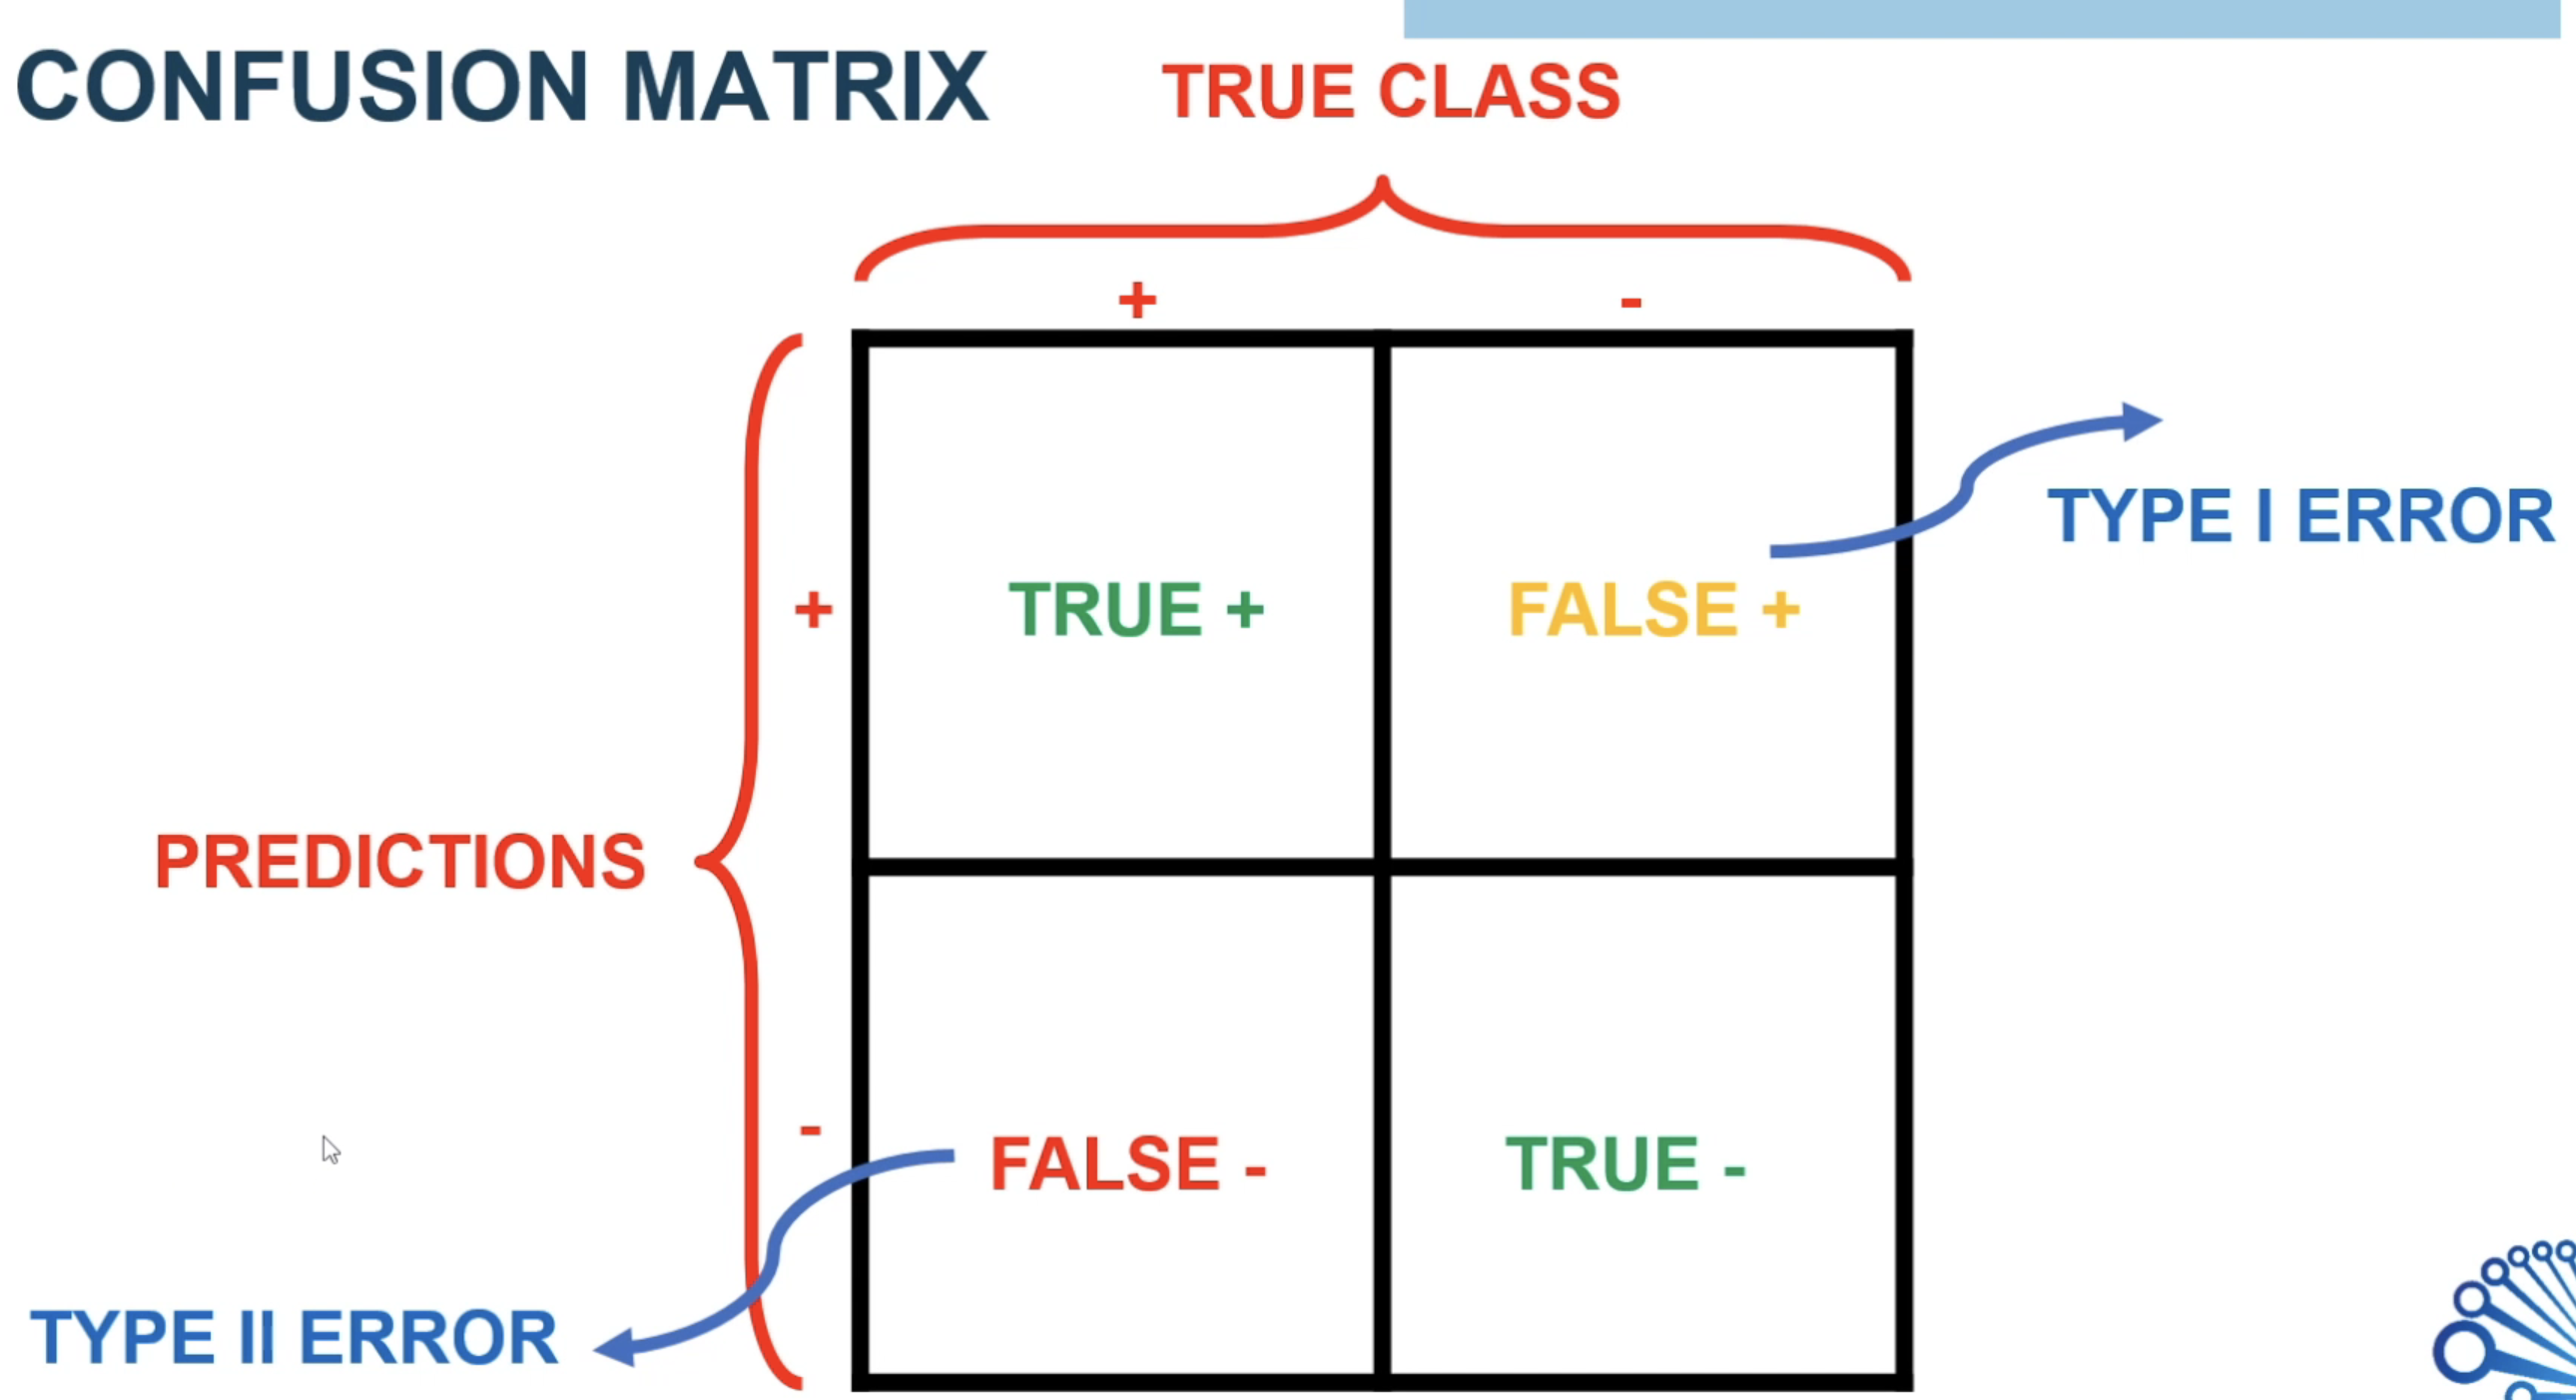

In [89]:
# To run evaluation on the trained model - for this we pass the test data
y_predict = svc_model.predict(X_test)

In [90]:
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [92]:
# Now we have the y_test as True value and y_predict as predicted value - We plot the confusion matrix
# Confusion matrix gives the one-stop shop for all the matrix, including the classified and misclassified samples.

cm = confusion_matrix(y_test, y_predict)

<Axes: >

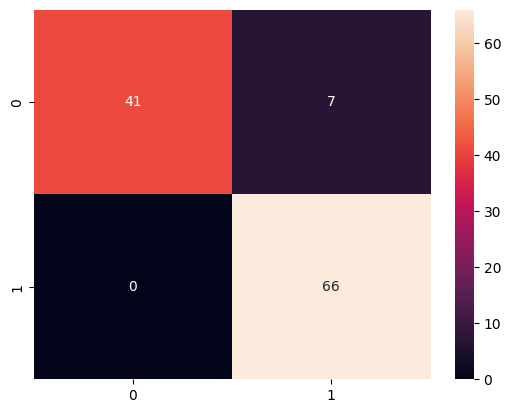

In [94]:
# To view the Confusion Matrix we use seaborn heatmap.

sns.heatmap(cm, annot=True)

In [95]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



# STEP #6: IMPROVING THE MODEL

### First step is Data Normalization.

- 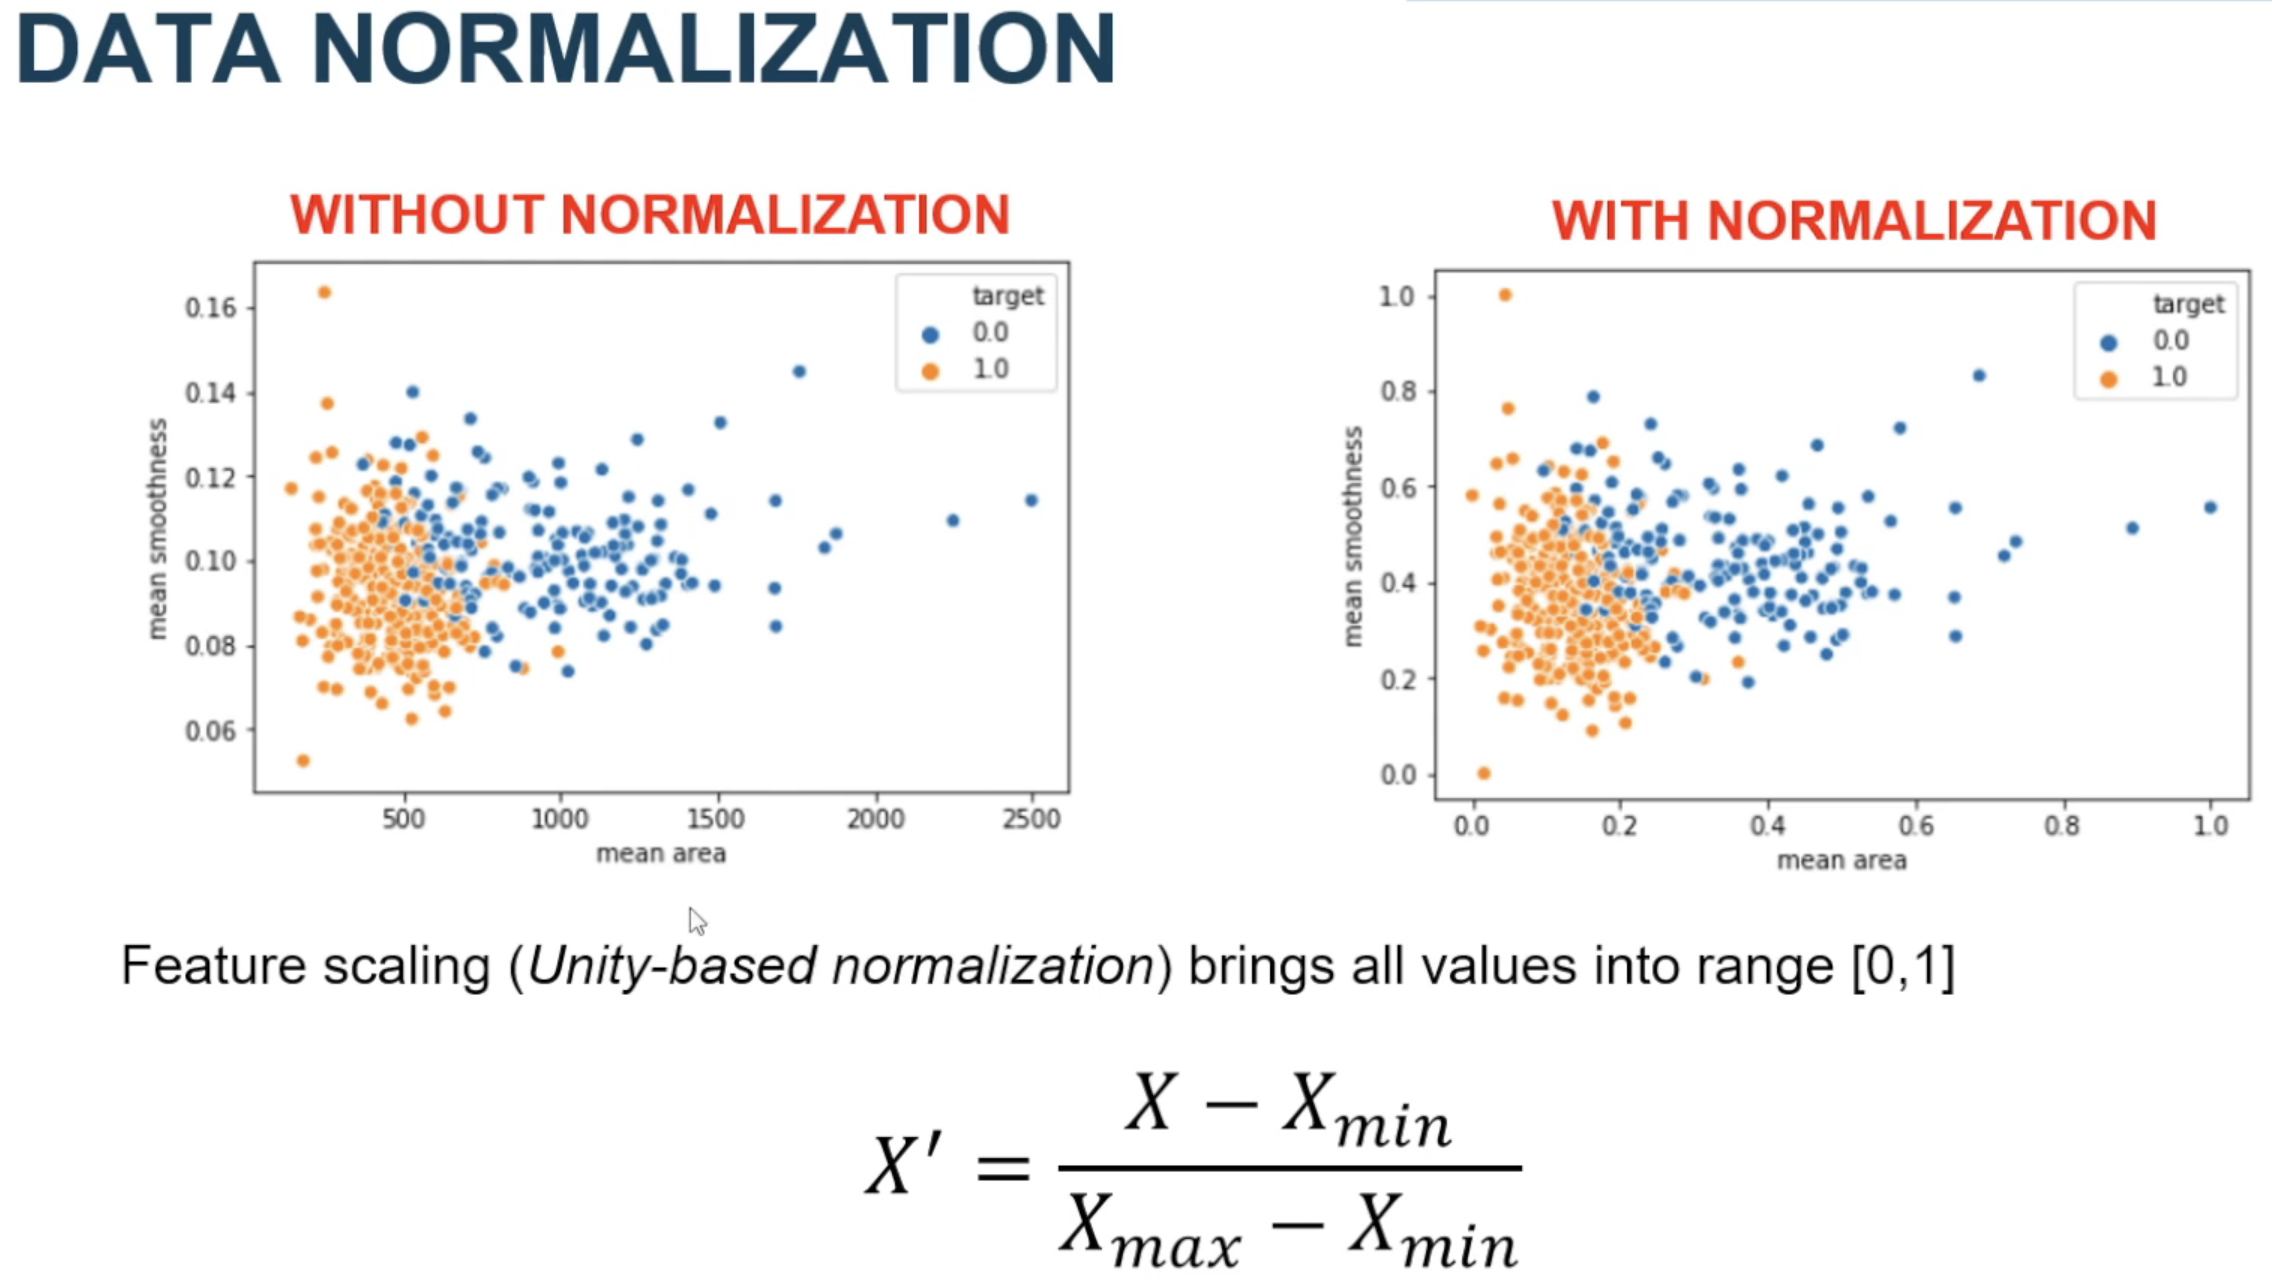
  
- Mean smoothness has a very small number - 0.06 to 0.16
- However, the mean area is in like 2500.
- This data will cause a lot of problems when we train the ML models.
- For that, we have to normalize the data. - **Unity-Based Normalization**.
- After normalization, the mean area is from 0 to 1. And mean smoothness is from 0 to 1.
- This is called Feature Scaling.
- Subtract each of the sample points with the minimum value and divide by the range Xmax - Xmin.
    - This will normalize the data between 0 and 1.

### SVM Parameters Optimization

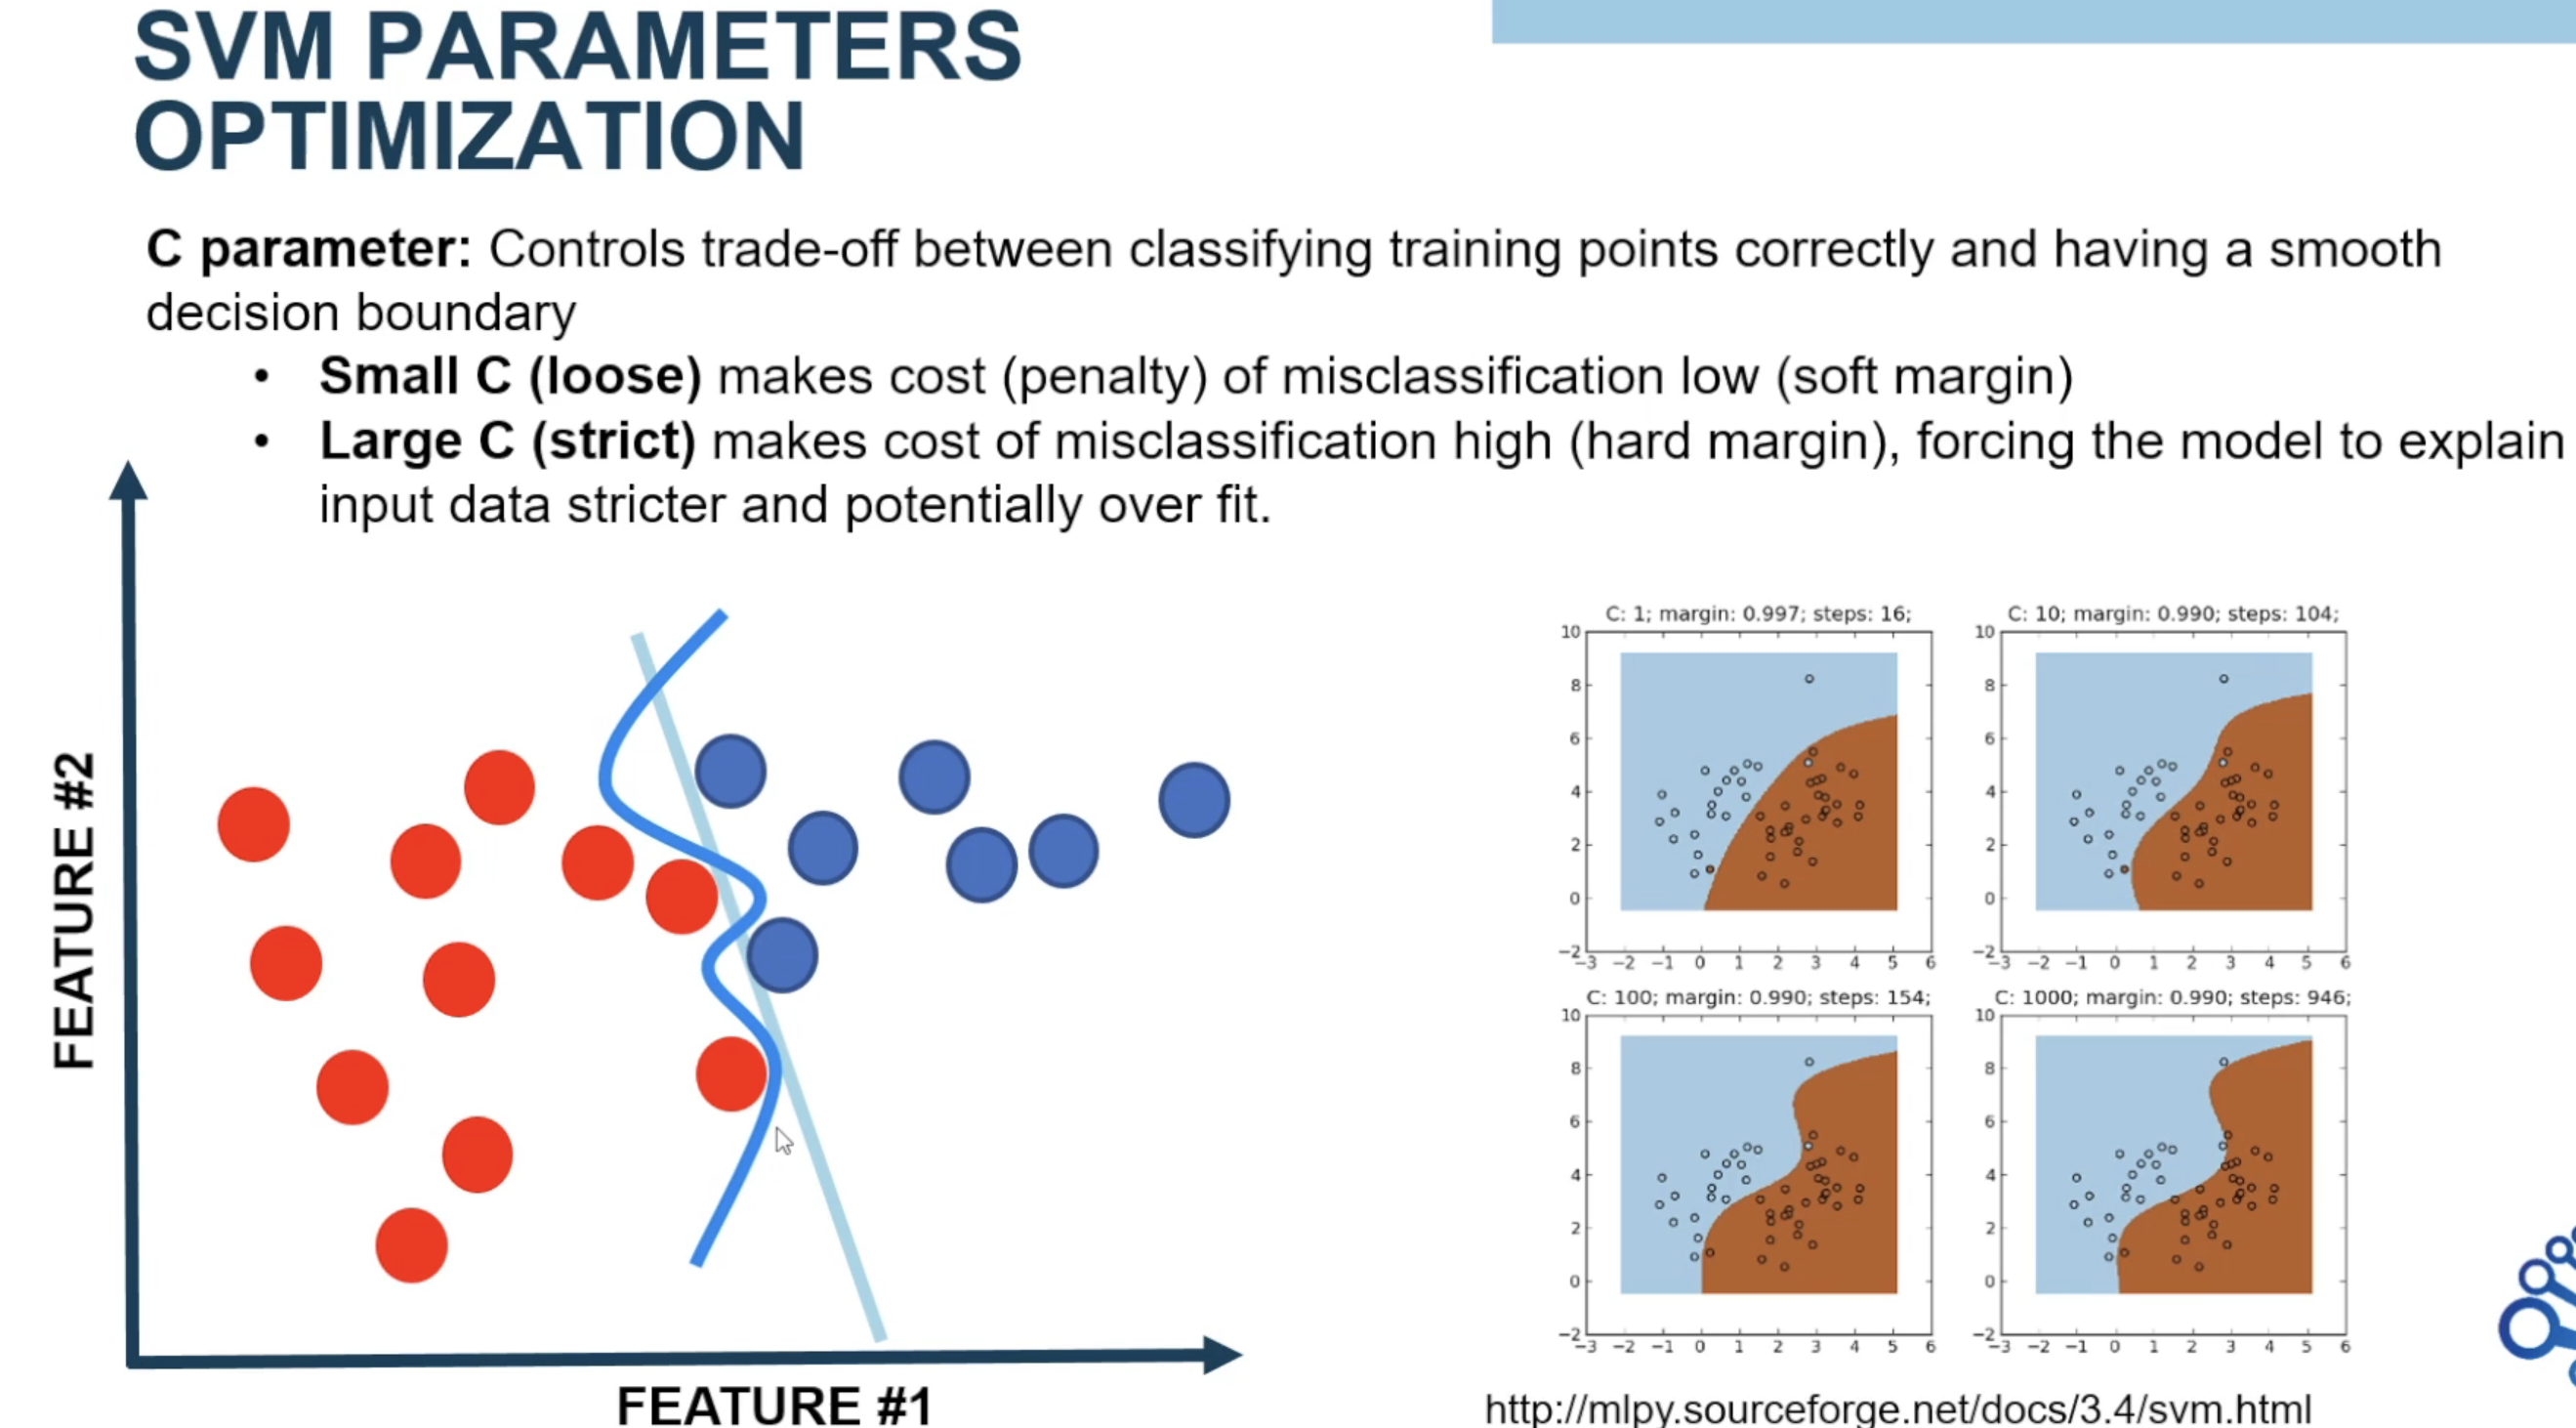

- When we use the SVM we use the default parameters.
- We have two key parameters that we can optimize during the process:
    - **C parameters**
        - Control the Trade-off between the classifying training points correctly and having a smooth decision boundary.
        - This parameter specifies the penalty. - How can we penalize the model if it misclassified the data point?
    - If we use a **small C value** it means our penalty is kind of **loose**. - Like cool teacher.
        - If the model misclassifies the dataset, we will not penalize much.
        - Means to have kind of smoother boundary between the two classification points. 
    - If we have **Large C value**, it means we have a strict model
        - Cost of misclassification is high. If we do something wrong, if we misclassify any of these points.
        - We need to bend our boundaries a little bit more to have a detailed or fine line in here.
        - Make fitted specifically for this training dataset.
        - When we have a **larger C value**, it is more prone to **overfitting**.
            - Overfitting data specifically for training dataset.
    - If we change the C value from 1 to 10 to 100 to 1000, we observe the boundary layer move from smooth to sharp(overfitted)/strict boundary line.
 
      
    - **Gamma Parameters**
 
      
        - Controls how far the influence of single traning set reaches.
        - Specify the spread of the influence of data points.
        - 